In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [3]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [4]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


<Axes: xlabel='Gene One', ylabel='Gene Two'>

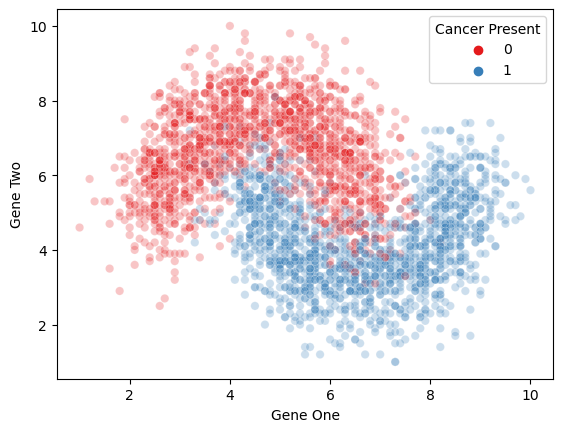

In [6]:
sns.scatterplot(df, x='Gene One', y='Gene Two', hue='Cancer Present', palette='Set1', alpha=.25)

<Axes: xlabel='Cancer Present', ylabel='count'>

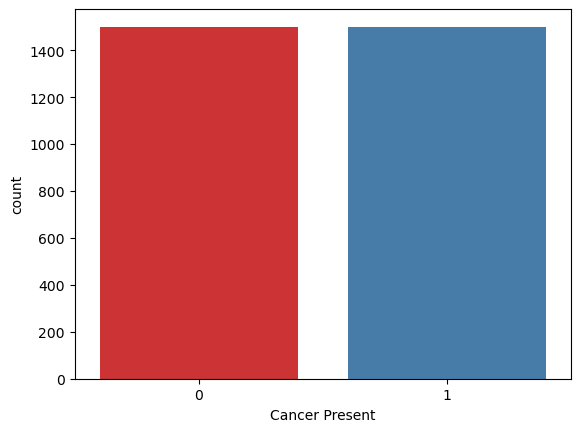

In [7]:
sns.countplot(df, x='Cancer Present', palette='Set1')

In [8]:
X, y = df.drop(columns='Cancer Present'), df['Cancer Present']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
pipe = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])

In [11]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('svm', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'svm': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svm__C': 1.0,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 'scale',
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

In [16]:
param_grid = {
    'svm__C': np.logspace(-4, 3, num=20),
    'svm__kernel': ['linear', 'rbf'],
}

In [17]:
grid = GridSearchCV(pipe, param_grid, verbose=3)

In [18]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .svm__C=0.0001, svm__kernel=linear;, score=0.510 total time=   0.0s
[CV 2/5] END .svm__C=0.0001, svm__kernel=linear;, score=0.510 total time=   0.0s
[CV 3/5] END .svm__C=0.0001, svm__kernel=linear;, score=0.510 total time=   0.0s
[CV 4/5] END .svm__C=0.0001, svm__kernel=linear;, score=0.510 total time=   0.0s
[CV 5/5] END .svm__C=0.0001, svm__kernel=linear;, score=0.510 total time=   0.0s
[CV 1/5] END ....svm__C=0.0001, svm__kernel=rbf;, score=0.510 total time=   0.1s
[CV 2/5] END ....svm__C=0.0001, svm__kernel=rbf;, score=0.510 total time=   0.1s
[CV 3/5] END ....svm__C=0.0001, svm__kernel=rbf;, score=0.510 total time=   0.1s
[CV 4/5] END ....svm__C=0.0001, svm__kernel=rbf;, score=0.510 total time=   0.1s
[CV 5/5] END ....svm__C=0.0001, svm__kernel=rbf;, score=0.510 total time=   0.1s
[CV 1/5] END svm__C=0.00023357214690901214, svm__kernel=linear;, score=0.779 total time=   0.0s
[CV 2/5] END svm__C=0.0002335721

[CV 5/5] END svm__C=0.2069138081114788, svm__kernel=linear;, score=0.871 total time=   0.0s
[CV 1/5] END svm__C=0.2069138081114788, svm__kernel=rbf;, score=0.936 total time=   0.0s
[CV 2/5] END svm__C=0.2069138081114788, svm__kernel=rbf;, score=0.890 total time=   0.0s
[CV 3/5] END svm__C=0.2069138081114788, svm__kernel=rbf;, score=0.924 total time=   0.0s
[CV 4/5] END svm__C=0.2069138081114788, svm__kernel=rbf;, score=0.921 total time=   0.0s
[CV 5/5] END svm__C=0.2069138081114788, svm__kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/5] END svm__C=0.4832930238571752, svm__kernel=linear;, score=0.848 total time=   0.0s
[CV 2/5] END svm__C=0.4832930238571752, svm__kernel=linear;, score=0.840 total time=   0.0s
[CV 3/5] END svm__C=0.4832930238571752, svm__kernel=linear;, score=0.871 total time=   0.0s
[CV 4/5] END svm__C=0.4832930238571752, svm__kernel=linear;, score=0.855 total time=   0.0s
[CV 5/5] END svm__C=0.4832930238571752, svm__kernel=linear;, score=0.871 total time=   0.0s
[CV

[CV 2/5] END svm__C=428.1332398719387, svm__kernel=rbf;, score=0.902 total time=   0.0s
[CV 3/5] END svm__C=428.1332398719387, svm__kernel=rbf;, score=0.926 total time=   0.0s
[CV 4/5] END svm__C=428.1332398719387, svm__kernel=rbf;, score=0.931 total time=   0.0s
[CV 5/5] END svm__C=428.1332398719387, svm__kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/5] END .svm__C=1000.0, svm__kernel=linear;, score=0.848 total time=   0.9s
[CV 2/5] END .svm__C=1000.0, svm__kernel=linear;, score=0.843 total time=   0.9s
[CV 3/5] END .svm__C=1000.0, svm__kernel=linear;, score=0.871 total time=   1.0s
[CV 4/5] END .svm__C=1000.0, svm__kernel=linear;, score=0.855 total time=   1.1s
[CV 5/5] END .svm__C=1000.0, svm__kernel=linear;, score=0.871 total time=   1.0s
[CV 1/5] END ....svm__C=1000.0, svm__kernel=rbf;, score=0.936 total time=   0.1s
[CV 2/5] END ....svm__C=1000.0, svm__kernel=rbf;, score=0.902 total time=   0.1s
[CV 3/5] END ....svm__C=1000.0, svm__kernel=rbf;, score=0.926 total time=   0.1s


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': array([1.00000000e-04, 2.33572147e-04, 5.45559478e-04, 1.27427499e-03,
       2.97635144e-03, 6.95192796e-03, 1.62377674e-02, 3.79269019e-02,
       8.85866790e-02, 2.06913808e-01, 4.83293024e-01, 1.12883789e+00,
       2.63665090e+00, 6.15848211e+00, 1.43844989e+01, 3.35981829e+01,
       7.84759970e+01, 1.83298071e+02, 4.28133240e+02, 1.00000000e+03]),
                         'svm__kernel': ['linear', 'rbf']},
             verbose=3)

In [19]:
grid.best_params_

{'svm__C': 2.6366508987303554, 'svm__kernel': 'rbf'}

In [20]:
y_pred = grid.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.94      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



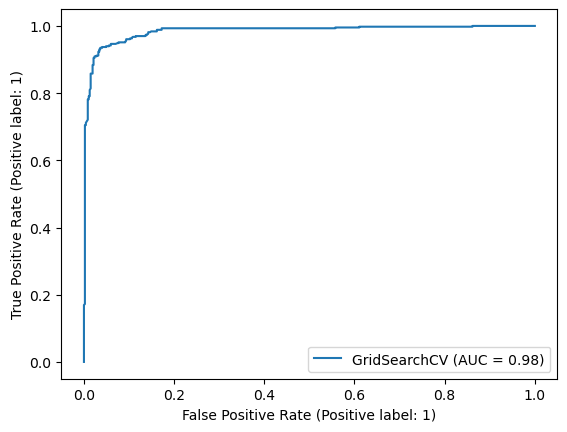

In [22]:
RocCurveDisplay.from_estimator(grid, X_test, y_test)